In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle
import joblib
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Load data in chunks to handle large file size
chunk_size = 500000  # Adjust chunk size for memory efficiency
chunks = []

# Reading the dataset in chunks
for chunk in pd.read_csv(r'C:/Users/User/Desktop/MDT 28/Assignments/Microsoft -Classifying Cybersecurity Incidents/GUIDE_Test.csv/GUIDE_Test.csv', chunksize=chunk_size, low_memory=False):
    # Optimize memory usage by downcasting data types
    for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='integer')
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)
del chunks  # Free up memory

In [3]:
features = ['Id',
 'OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'DeviceId',
 'Sha256',
 'IpAddress',
 'Url',
 'Category',
 'IncidentGrade',
 'EntityType',
 'EvidenceRole']

df = df[features]

In [4]:
df.shape

(4147992, 14)

In [5]:
df = df.drop_duplicates()

In [6]:
df.isnull().sum()

Id               0
OrgId            0
IncidentId       0
AlertId          0
DetectorId       0
AlertTitle       0
DeviceId         0
Sha256           0
IpAddress        0
Url              0
Category         0
IncidentGrade    0
EntityType       0
EvidenceRole     0
dtype: int64

In [7]:
cat_col = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']

In [8]:
# Load the encoders dictionary from the pickle file
with open('label_encoders.pkl', 'rb') as file:
    loaded_encoders = pickle.load(file)

# Apply the encoders to the test data
for column in cat_col:
    try:
        df[column] = loaded_encoders[column].transform(df[column])
    except:
        continue

print("Encoders have been applied to the test data.")

Encoders have been applied to the test data.


In [9]:
X = df.drop('IncidentGrade', axis = 1)
y = df['IncidentGrade']
del df

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [11]:
model = joblib.load('best_model.joblib')

In [12]:
test_data_pred = model.predict(X)

accuracy = accuracy_score(y, test_data_pred)
recall = recall_score(y, test_data_pred, average='macro')  # Adjust for binary/multiclass
f1 = f1_score(y, test_data_pred, average='macro')          # Adjust for binary/multiclass
precision = precision_score(y, test_data_pred, average='macro')  # Adjust for binary/multiclass


print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")

Accuracy: 0.9257820344308735
Recall: 0.9203978879535909
F1 Score: 0.9180690192423975
Precision: 0.915933680899041


In [13]:
report = classification_report(y, test_data_pred, output_dict=True) 
report_df = pd.DataFrame(report).transpose() 
report_df

,precision,recall,f1-score,support
0,0.923777,0.927700,0.925735,1.187889e+06
1,0.868211,0.895142,0.881471,6.183330e+05
2,0.955813,0.938351,0.947001,1.326025e+06
accuracy,0.925782,0.925782,0.925782,9.257820e-01
macro avg,0.915934,0.920398,0.918069,3.132247e+06
weighted avg,0.926370,0.925782,0.926000,3.132247e+06


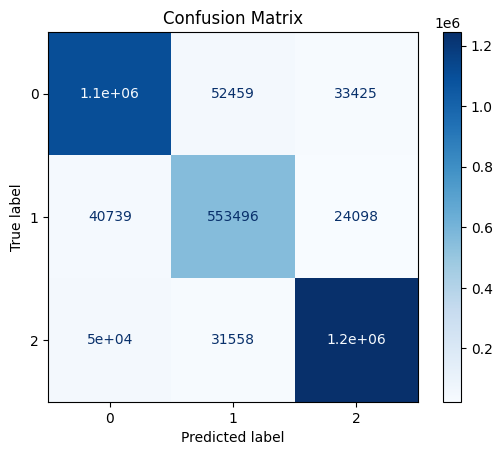

In [15]:
cm = confusion_matrix(y, test_data_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
